In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time

# 학습러닝
1) 지도학습 : 입력 데이터와 해당하는 정답 데이터를 사용하여 모델을 학습시키는 방법
    - 주어진 입력 데이터에 대한 출력 값을 예측하는 모델을 만드는 것
    - 머신러닝 -> 분류/회귀
    - 딥러닝 -> 이미지 분류(CNN), 자연어 처리(NLP)
        - 장점 : 정답이 무엇인지 명확히 알기 때문에 높은 정확도를 기대할 수 있다.
        - 단점 : 대량의 라벨링된 데이터가 필요하다.(라벨링 비용이 많이 들고, 시간이 오래걸릴 수 있다.)
    
2) 비지도학습 : 정답없이 입력 데이터의 구조나 패턴을 학습하는 방법
    - 주어진 데이터에서 유사한 것끼리 그룹화하거나 데이터의 구조를 이해하는 것이 목표이다.
    - 머신러닝 -> 클러스터링, 군집화, K-Means, KNN
    - 딥러닝 -> 오토인코더(Autoencoders)(이미지 압축, 이상 탐지), 생성 모델(Generative Models)(새로운 이미지 생성(GANs), 새로운 데이터 생성하거나 잠재공간 탐색(VAE))
        - 장점 : 데이터 라벨링이 필요하지 않아, 데이터 준비가 비교적 편리하다.
        - 단점 : 정답이 없기 때문에 모델 평가가 어렵고, 결과를 해석하기 힘들다.

3) 전이학습 : 이미 학습된 모델의 지식을 새로운 문제에 적용하는 방법
    - 보통 대규모 데이터 셋에서 학습된 모델을 사용하여 소규모 데이터 셋의 문제를 해결한다.
    - 머신러닝 -> Fine-tuning
    - 딥러닝 -> 이미지 분류(CNN), 자연어 처리(NLP)
        - 장점 : 데이터셋이 부족한 경우에도 효과적인 모델을 만들 수 있다.
        - 단점 : 사전 학습된 모델이 해당 학습 데이터에 맞지 않는 경우 처리할 수 없다.

4) 강화학습 : 에이전트가 환경과 상호작용하면서 보상을 최대화하는 방향으로 학습시키는 방법
    - 에이전트는 최대한 다양하게 행동을 시도하고, 그 결과로부터 얻은 보상을 기반으로 학습을 진행한다.
    - 머신러닝 -> 게임
    - 딥러닝 -> Deep Q-Networks(DQN)(강화학습과 딥러닝을 결합하여 복잡한 환경에서 에이전트가 최적의 정책을 학습할 수 있도록 한다.), Proximal Policy Optimization(PPO)(복잡한 환경에서 안정적으로 학습할 수 있는 강화학습 알고리즘)
       - 장점 : 복잡한 환경에서 높은 성능을 보일 수 있고, 실시간으로 학습하고 적응할 수 있다.
       - 단점 : 학습 시간이 오래 걸린다. 보상 설계가 어렵다.

# Sequential 모델 
: 신경망 모델을 구축하는 가장 간단한 방법 중 하나층(layer)을 순차적으로 쌓아 올리는 방식으로 구성된다.

model = Sequential()
- 층 추가 : model.add()
- 모델 컴파일 : model.compile()
- 모델 학습 : model.fit()
- 모델 평가 : model.evaluate()
- 모델 예측 : model.predict()

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.build(input_shape=(None, 3)) # 모델의 구조를 정의하고, 층을 초기화 (배치크기 : None, 특성 : 3)
model.weights # 모델의 가중치

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 1.23610049e-01, -1.57758519e-01,  1.43164694e-01,
         -2.79441476e-02,  1.58292055e-01,  1.48727208e-01,
          8.16323757e-02,  1.17440939e-01,  2.33837008e-01,
          2.09326386e-01,  1.20384097e-01, -2.75878549e-01,
          9.69349742e-02,  1.68944925e-01, -2.73415446e-02,
          5.91203272e-02,  1.00875348e-01,  4.72342074e-02,
         -1.62333235e-01,  1.77411079e-01,  9.13679600e-04,
          1.25309914e-01,  1.82152927e-01,  2.34608114e-01,
         -1.15069777e-01,  1.66172802e-01, -1.17303669e-01,
         -2.71262288e-01, -1.72190666e-01, -1.02383062e-01,
         -1.78354979e-03, -9.34944600e-02,  1.08030289e-01,
          4.66821194e-02, -2.61530340e-01, -4.59813476e-02,
          2.79356599e-01, -2.00339302e-01, -1.76284164e-01,
         -1.63118064e-01, -2.07049310e-01, -2.64251471e-01,
         -2.10216284e-01, -6.15031272e-02,  5.62155545e-02,
          2.01799333e-01,  2.73

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 모델과 층에 이름 지정
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 모델의 입력 크기 지정
model = keras.Sequential()
model.add(keras.Input(shape=(3,))) # 입력 층 추가 (3개의 특성)
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
inputs = keras.Input(shape=(3,), name='my_input') # 입력층
features = layers.Dense(64, activation='relu')(inputs) # 64개 뉴런을 가진 완전 연결층 생성
outputs = layers.Dense(10, activation='softmax')(features) # 10개의 뉴런을 가진 완전 연결층 생성
model = keras.Model(inputs=inputs, outputs=outputs) # 입력층과 출력층을 사용하여 keras 함수형 API 모델 생성

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

In [13]:
features.shape

TensorShape([None, 64])

In [14]:
features.dtype

tf.float32

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# 다중 출력 신경망
vocabulary_size = 10000 # 사전 크기
num_tags = 100 # 태그 개수
num_departments = 4 # 부서 개수

title = keras.Input(shape=(vocabulary_size,), name='title') # 제목 입력 정의
text_body = keras.Input(shape=(vocabulary_size,), name='text_body') # 본문 입력 정의
tags = keras.Input(shape=(num_tags,), name='tags') # 태그 입력 정의

features = layers.Concatenate()([title, text_body, tags]) # 제목, 본문, 태그 하나로 연결하여 특성 벡터를 생성
features = layers.Dense(64, activation='relu')(features) # 연결된 특성 벡터를 64개의 특성으로 변환하고 ReLU함수를 적용

priority = layers.Dense(1, activation='sigmoid', name='priority')(features) # 특성벡터를 전달받아 하나의 출력을 생성하고 sigmoid 함수를 적용
department = layers.Dense(num_departments, activation='softmax', name='department')(features) # 특성 벡터로 4개의 출력을 생성한다.

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [17]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # (1280, 10000) 이진 행렬
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # (1280, 10000) 이진 행렬
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags)) # (1280, 100) 이진 행렬

priority_data = np.random.random(size=(num_samples, 1)) # (1280, 1) 실수 행렬
department_data = np.random.randint(0, 2, size=(num_samples, num_departments)) # (1280, 4) 이진 행렬

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"], # 평균제곱오차손실함수(mse), 교차손실엔트로피(crossentropy)
              metrics=[["mean_absolute_error"], ["accuracy"]]) # 평균절대오차매트릭(mae), 정확도
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data], # 우선순위 : mse, mae, 부서출력 : 엔트로피, 정확도
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 2ms/step


In [18]:
# 딕셔너리 형태로 전달
model.compile(optimizer='rmsprop', loss={'priority':'mean_squared_error', 'department':'categorical_crossentropy'},
              metrics={'priority':['mean_absolute_error'], 'department':['accuracy']})

model.fit({'title' : title_data, 'text_body':text_body_data, 'tags':tags_data},
          {'priority':priority_data, 'department':department_data},
          epochs=1)

model.evaluate({'title':title_data, 'text_body':text_body_data, 'tags':tags_data},
               {'priority':priority_data, 'department':department_data})

priority_preds, department_preds = model.predict({'title':title_data, 'text_body':text_body_data, 'tags':tags_data})

40/40 [==============================] - 0s 2ms/step


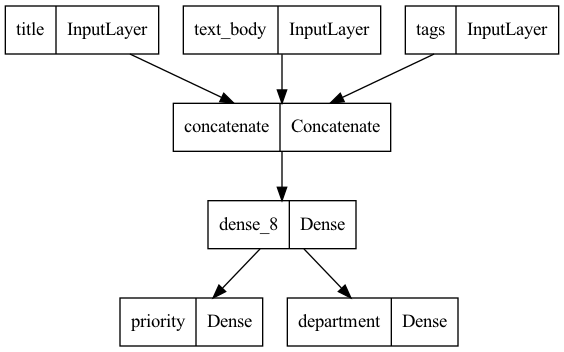

In [19]:
keras.utils.plot_model(model, 'ticket_classifier.png')

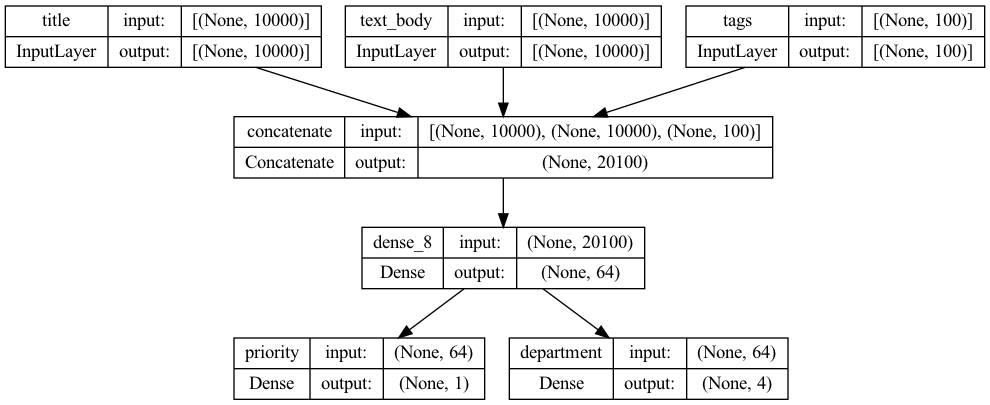

In [20]:
keras.utils.plot_model(model, 'ticket_classifier_with_shape_info.png', show_shapes = True)

In [21]:
model.layers

In [22]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [23]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [24]:
features = model.layers[4].output
features

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_8')>

In [25]:
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department, difficulty])

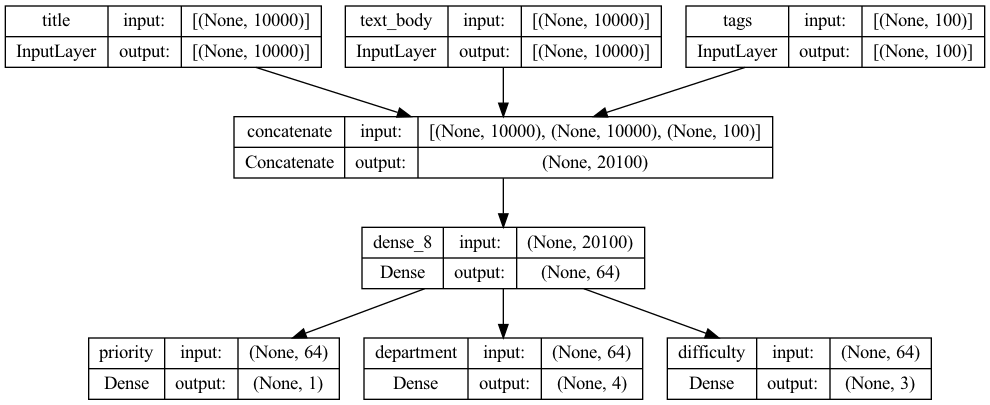

In [26]:
keras.utils.plot_model(new_model, 'updated_ticket_classifier.png', show_shapes=True)

## Keras에서 모델을 정의하는 방법
1. 함수형 API : 층을 연결하여 모델을 구성하는 방식
2. 서브클래싱 : 사용자 정의 클래스를 만들어 모델을 정의하는 방식

In [27]:
# 간단한 서브클래싱 모델
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate() # hidden : Concatenate 계층
        self.mixing_layer = layers.Dense(64, activation='relu') # hidden : dense_8
        self.priority_scorer = layers.Dense(1, activation='sigmoid') # output
        self.department_classifier = layers.Dense(num_departments, activation='softmax') # output

    def call(self, inputs):
        title = inputs['title'] # input
        text_body = inputs['text_body'] #input
        tags = inputs['tags'] # input

        features = self.concat_layer([title, text_body, tags]) # 입력을 연결
        features = self.mixing_layer(features) # 입력 특징을 혼합
        priority = self.priority_scorer(features) # 우선순위 예측
        department = self.department_classifier(features) # 부서 분류 결과
        return priority, department

In [28]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [29]:
model.compile(optimizer='rmsprop', loss=['mean_squared_error', 'categorical_crossentropy'], 
              metrics=[['mean_absolute_error'],['accuracy']])

model.fit({'title':title_data, 'text_body':text_body_data, 'tags':tags_data}, [priority_data, department_data], epochs=1)

model.evaluate({'title':title_data, 'text_body':text_body_data, 'tags':tags_data}, [priority_data, department_data])

priority_preds, department_preds = model.predict({'title':title_data, 'text_body':text_body_data, 'tags':tags_data})

40/40 [==============================] - 0s 8ms/step


In [30]:
# 서브클래싱 모델을 함수형 모델에 포함시키기
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2: # 클래스 수가 2인 경우 (이진 분류)
            num_units = 1
            activation = 'sigmoid'
        else :
            num_units = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

In [31]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [32]:
# 함수형 모델을 서브클래싱 모델에 포함시키기
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs) # 이진분류기 모델

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation='relu')
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

In [33]:
from tensorflow.keras.datasets import mnist

def get_mnist_model(): # 이미지 분류 모델
    inputs = keras.Input(shape=(28*28,)) # 28x28의 이미지를 1차원 벡터로 변환
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features) # 50프로 드롭아웃 (과적합 방지)
    outputs = layers.Dense(10, activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

In [34]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype('float32')/255
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255

train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]                                  

In [35]:
model = get_mnist_model()
model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2909 - accuracy: 0.9126 - val_loss: 0.1488 - val_accuracy: 0.9576
Epoch 2/3
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1652 - accuracy: 0.9546 - val_loss: 0.1234 - val_accuracy: 0.9662
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


In [36]:
predictions[4]

array([1.3891431e-06, 6.8040788e-11, 2.0114805e-06, 2.7033632e-08,
       9.9935514e-01, 4.8473908e-07, 3.2477819e-06, 3.0560772e-05,
       5.1643917e-07, 6.0660351e-04], dtype=float32)

## Callback
- EarlyStopping 콜백 : 모델의 성능 지표가 일정 시간동안 개선되지 않을 경우 학습을 조기 종료 (과적합 방지, 학습 시간 단축)
    - moniter : 모니터링할 성능 지표
    - patience : 성능이 개선되지 않는 에포크 수
    - mode : 최소화 또는 최대화할 지표
    - verbose : 로그 출력 여부

- ModelCheckpoint 콜백 : 모델의 성능이 가장 좋았던 시점의 모델 가중치를 저장하는 기능
    - moniter : 모니터링할 성능 지표
    - save_best_only : 최고 성능 모델만 저장
    - save_weights_only : 모델 구조가 아닌 가중치만 저장
    - mode : 최소화 또는 최대화할 지표
    - filepath : 저장 경로 및 파일명

In [37]:
callback_lists = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy', # 검증 정확도
        patience=2, # 2 에포크 동안 개선이 없으면 조기 종료
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.h5', # 파일경로 (가장 좋은 성능을 보인 모델을 파일에 저장하겠다.)
        monitor='val_loss', # 검증 손실
        save_best_only=True,
    )
]

In [38]:
model = get_mnist_model()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, callbacks=callback_lists, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2936 - accuracy: 0.9131 - val_loss: 0.1460 - val_accuracy: 0.9584
Epoch 2/10
  15/1563 [..............................] - ETA: 11s - loss: 0.1667 - accuracy: 0.9542

/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 14s 9ms/step - loss: 0.1644 - accuracy: 0.9546 - val_loss: 0.1226 - val_accuracy: 0.9659
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1415 - accuracy: 0.9620 - val_loss: 0.1097 - val_accuracy: 0.9716
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1265 - accuracy: 0.9671 - val_loss: 0.1112 - val_accuracy: 0.9744
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1164 - accuracy: 0.9712 - val_loss: 0.1186 - val_accuracy: 0.9724
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1111 - accuracy: 0.9731 - val_loss: 0.1137 - val_accuracy: 0.9746
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1034 - accuracy: 0.9747 - val_loss: 0.1163 - val_accuracy: 0.9749
Epoch 8/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1002 - accuracy: 0.9764 - val_loss: 0.1192 - val_accuracy: 0

In [39]:
model = keras.models.load_model('checkpoint_path.h5') # 저장된 가장 좋은 성능의 모델 호출
model

In [40]:
# 사용자 정의 콜백
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback): # keras의 Callback 클래스를 상속받아 사용자 정의 콜백 클래스를 만든다.
    def on_train_begin(self, logs): # 모델 학습이 시작될 때, 호출되는 메서드
        self.per_batch_losses = [] # 각 배치별 손실 값을 저장할 리스트

    def on_batch_end(self, batch, logs): # 각 배치 학습이 끝날 때 호출되는 메서드
        self.per_batch_losses.append(logs.get('loss')) # 리스트에 손실 값을 추가한다.

    def on_epoch_end(self, epoch, logs): # 각 에포크 학습이 끝날 때 호출되는 메서드
        plt.clf() # 이전 플롯을 지운다.
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label='Training loss for each batch')
        plt.xlabel(f'Batch (epoch {epoch})')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f'plot_at_epoch_{epoch}')
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2983 - accuracy: 0.9107 - val_loss: 0.1536 - val_accuracy: 0.9548
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1625 - accuracy: 0.9524 - val_loss: 0.1238 - val_accuracy: 0.9672
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1417 - accuracy: 0.9619 - val_loss: 0.1126 - val_accuracy: 0.9713
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1255 - accuracy: 0.9676 - val_loss: 0.1048 - val_accuracy: 0.9733
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1169 - accuracy: 0.9712 - val_loss: 0.1039 - val_accuracy: 0.9762
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1088 - accuracy: 0.9737 - val_loss: 0.1140 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1027 - accuracy: 0.9755 - val_loss: 0.1182 - val_ac

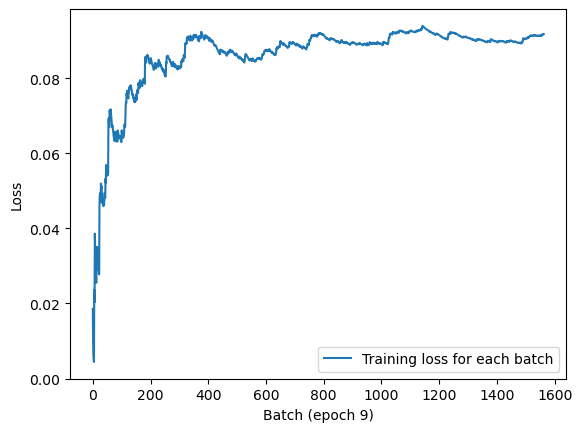

In [41]:
model = get_mnist_model()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, callbacks=[LossHistory()], validation_data=(val_images, val_labels))

In [42]:
train_images.shape, train_labels.shape

((50000, 784), (50000,))

In [43]:
# 텐서보드 : 텐서보드 서버를 활용해서 웹 브라우저에서 시각화 결과를 확인할 수 있다.
model = get_mnist_model()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
tensorboard = keras.callbacks.TensorBoard(log_dir='./tb_logs',)
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 0.2913 - accuracy: 0.9128 - val_loss: 0.1520 - val_accuracy: 0.9573
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1639 - accuracy: 0.9543 - val_loss: 0.1245 - val_accuracy: 0.9654
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1396 - accuracy: 0.9624 - val_loss: 0.1075 - val_accuracy: 0.9716
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1238 - accuracy: 0.9678 - val_loss: 0.1091 - val_accuracy: 0.9729
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1173 - accuracy: 0.9699 - val_loss: 0.1101 - val_accuracy: 0.9745
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1072 - accuracy: 0.9730 - val_loss: 0.1029 - val_accuracy: 0.9773
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1075 - accuracy: 0.9741 - val_loss: 0.1057 - v

In [44]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/Users/jeon-yewon/miniforge3/lib/python3.10/site-packages/tensorboard/compat/__init__.py", line 42, in tf
    from tensorboard.compat import notf  # noqa: F401
ImportError: cannot import name 'notf' from 'tensorboard.compat' (/Users/jeon-yewon/miniforge3/lib/python3.10/site-packages/tensorboard/compat/__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jeon-yewon/miniforge3/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/Users/jeon-yewon/miniforge3/lib/python3.10/site-packages/tensorboard/main.py", line 38, in run_main
    main_lib.global_init()
  File "/Users/jeon-yewon/miniforge3/lib/python3.10/site-packages/tensorboard/main_lib.py", line 50, in global_init
    if getattr(tf, "__version__", "stub") == "stub":
  File "/Users/jeon-yewon/miniforge3/lib/python3.10/site-p

In [45]:
# 사용자 정의 훈련, 평가 루프
# SparseCategoricalAccuracy : 분류 모델 평가 지표 (다중 클래스 분류, 타겟 레이블이 정수)
metric = keras.metrics.SparseCategoricalAccuracy() # 매트릭 객체 생성
targets = [0,1,2] # 타겟 레이블
predictions = [[1,0,0], [0,1,0], [0,0,1]] # 예측 결과
metric.update_state(targets, predictions) # 상태 업데이트
current_result = metric.result()
print(f'결과 : {current_result:.2f}')

결과 : 1.00


In [46]:
values = [0,1,2,3,4]
mean_tracker = keras.metrics.Mean() # Mean 메트릭
for value in values:
    mean_tracker.update_state(value)

print(f'평균 지표: {mean_tracker.result():.2f}')

평균 지표: 2.00


In [47]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy() # 손실함수
optimizer = keras.optimizers.RMSprop() # 최적화 알고리즘
metrics = [keras.metrics.SparseCategoricalAccuracy()] # 메트릭
loss_tracking_metric = keras.metrics.Mean() # 손실값의 평균

In [48]:
# 단계 훈련 (한 단계)
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True) #예측 결과
        loss = loss_fn(targets, predictions) # 손실 값

    gradients = tape.gradient(loss, model.trainable_weights) # 손실 함수에 대한 모델 가중치의 gradient를 계산
    optimizer.apply_gradients(zip(gradients, model.trainable_weights)) # gradient를 사용하여 모델 가중치를 업데이트

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions) # 메트릭 상태 업데이트
        logs[metric.name] = metric.result() # 로그에 결과 저장

    loss_tracking_metric.update_state(loss) # Mean 메트릭을 업데이트
    logs['loss'] = loss_tracking_metric.result() # 평균 값을 계산
    return logs

In [49]:
# 지표 재설정
def reset_metrics():
    for metric in metrics:
        metric.reset_state() # 상태 초기화
    loss_tracking_metric.reset_state() # 손실 평균 값 초기화

In [50]:
import tensorflow as tf

training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)) # train 데이터를 TensorFlow의 Dataset 객체로 변환
training_dataset = training_dataset.batch(32) # 배치 크기 설정
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f'{epoch}번째 에포크 결과')
    for key, value in logs.items():
        print(f'...{key}: {value:.4f}')

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9137
...loss: 0.2885
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9546
...loss: 0.1576
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9637
...loss: 0.1286


In [51]:
# 검증 데이터를 활용한 모델 성능 평가
def test_step(inputs, targets):
    predictions = model(inputs, training=False) # 예측값 생성
    loss = loss_fn(targets, predictions) # 손실 계산

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions) # 메트릭 상태 업데이트
        logs['val_' + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss) # 평균 손실 값
    logs['val_loss'] = loss_tracking_metric.result()
    return logs

In [52]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print('평가 결과')
for key,value in logs.items():
    print(f'...{key}: {value:.4f}')

평가 결과
...val_sparse_categorical_accuracy: 0.9682
...val_loss: 0.1157


## 데코레이터 (컴퓨터도 읽을 수 있는 메모)
@tf.function 데코레이터 : 함수를 TensorFlow 그래프 모드 변환 (성능 향상, 자동 그래프 최적화, TPU/GPU 가속 지원)

In [53]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False) # 예측값 생성
    loss = loss_fn(targets, predictions) # 손실 계산

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions) # 메트릭 상태 업데이트
        logs['val_' + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss) # 평균 손실 값
    logs['val_loss'] = loss_tracking_metric.result()
    return logs

In [54]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print('평가 결과')
for key,value in logs.items():
    print(f'...{key}: {value:.4f}')

평가 결과
...val_sparse_categorical_accuracy: 0.9682
...val_loss: 0.1157


In [55]:
# fit 메소드를 활용하여 사용자 정의 훈련 스탭
loss_fn = keras.losses.SparseCategoricalCrossentropy() # 손실함수
loss_tracker = keras.metrics.Mean(name='loss') # 손실 평균

class CustomModel(keras.Model): # 사용자 정의 모델
    def train_step(self, data): # 학습 단계
        inputs, targets = data # 입력 데이터, 타겟데이터
        with tf.GradientTape() as tape: # 그레이언트 테잎을 통해 손실 계산
            predictions = self(inputs, training=True) # 예측
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {'loss': loss_tracker.result()}

    # property 데코레이터 : 클래스 내부 속성을 마치 메소드처럼 사용할 수 있게 해주는 기능
    @property 
    def metrics(self):
        return [loss_tracker]

In [56]:
inputs = keras.Input(shape=(28*28,)) # shape(28*28) = 784 (1d), shape(28*28,) = (1,784) (2d)
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation='softmax')(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2922
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1644
Epoch 3/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1336


In [57]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [58]:
inputs = keras.Input(shape=(28*28,))
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation='softmax')(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2920 - sparse_categorical_accuracy: 0.9139
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1647 - sparse_categorical_accuracy: 0.9535
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1373 - sparse_categorical_accuracy: 0.9626
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1278 - sparse_categorical_accuracy: 0.9678
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1192 - sparse_categorical_accuracy: 0.9702


In [59]:
# 사용자 정의 지표
class RootMeanSquaredError(keras.metrics.Metric): # 메트릭을 상속받아 RMSE 계산
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros') # 누적 합
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros', dtype='int32') # 샘플 수

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1]) # y_true를 원-핫 인코딩 변환
        mse = tf.reduce_sum(tf.square(y_true - y_pred)) # 실제 값과 예측 값 차이의 제곱을 계산
        self.mse_sum.assign_add(mse) # 계산 누적
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples) # 샘플 수 계산

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32)) # RMSE 계산

    def reset_state(self): # 초기화
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [60]:
model = get_mnist_model()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy', RootMeanSquaredError()])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2963 - accuracy: 0.9134 - rmse: 7.1833 - val_loss: 0.1438 - val_accuracy: 0.9585 - val_rmse: 7.3586
Epoch 2/3
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1653 - accuracy: 0.9540 - rmse: 7.3551 - val_loss: 0.1216 - val_accuracy: 0.9668 - val_rmse: 7.4057
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9737 - rmse: 7.4353
